In [39]:
def bubble_sort(arr):
  # どこにあるbubble-sort
  change = True
  while change:
    change = False
    for i in range(len(arr) - 1):
      if arr[i].distance > arr[i + 1].distance:
        arr[i].distance, arr[i + 1].distance = arr[i + 1].distance, arr[i].distance
        change = True
  return arr

In [40]:
import math

def get_distance(x1, y1, x2, y2):
    # どこにでもある距離を求める関数(三平方の定理)
    d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return d

- good1
  - 特徴点描画のための間引き済み配列
- good2
  - ソートのための間引き済み配列
- good3
  - 最も似ている順にソートされた配列

--- Most similar point ---
img2:  (42.58426284790039, 119.7998275756836)
target:  (907.9458618164062, 723.941650390625) 

--- Second similar point ---
img2:  (83.32940673828125, 361.1104431152344)
target:  (934.4030151367188, 873.919189453125) 

--- Distance of points in img2 ---
img2: 244.72633679831995 

--- Distance of points in target ---
target: 152.29328017039438 

--- Ratio of two images ---
img2 : target = 1 : 0.6223003300862544 

-- Summary --
img2: x1 
target : x1.6069411370252595


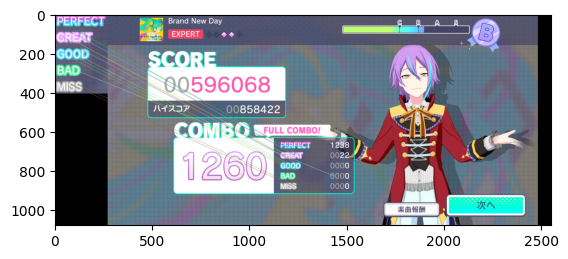

In [50]:
import cv2
import matplotlib.pyplot as plt

# 検索する部分
img1 = cv2.cvtColor(cv2.imread("img2.png"), cv2.COLOR_BGR2RGB)
# 検索対象
img2 = cv2.cvtColor(cv2.imread("../targets/wide.png"), cv2.COLOR_BGR2RGB)

# A-KAZE検出器の生成
akaze = cv2.AKAZE_create()                                

# 特徴量の検出と特徴量ベクトルの計算
kp1, des1 = akaze.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) , None)
kp2, des2 = akaze.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY) , None)

# Brute-Force Matcher生成
bf = cv2.BFMatcher()

# 特徴量ベクトル同士をBrute-Force＆KNNでマッチング
matches = bf.knnMatch(des1, des2, k=2)

# データを間引きする
ratio = 0.75
good1 = []
good2 = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        good1.append([m])
        good2.append(m)

# 対応する特徴点同士を描画
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good1, None, flags=2)

plt.imshow(img3)

good3 = bubble_sort(good2)

# 最も似ている基準点の座標
print('--- Most similar point ---')

print('img2: ', kp1[good3[0].queryIdx].pt)
print('target: ', kp2[good3[0].trainIdx].pt, '\n')

# 次に似ている基準点の座標
print('--- Second similar point ---')

print('img2: ', kp1[good3[1].queryIdx].pt)
print('target: ', kp2[good3[1].trainIdx].pt, '\n')

# それぞれの画像での2点間の距離を求める
distance_img2 = get_distance(
    x1=kp1[good3[0].queryIdx].pt[0],
    y1=kp1[good3[0].queryIdx].pt[1],
    x2=kp1[good3[1].queryIdx].pt[0],
    y2=kp1[good3[1].queryIdx].pt[1]
)

distance_target = get_distance(
    x1=kp2[good3[0].trainIdx].pt[0],
    y1=kp2[good3[0].trainIdx].pt[1],
    x2=kp2[good3[1].trainIdx].pt[0],
    y2=kp2[good3[1].trainIdx].pt[1]
)


print('--- Distance of points in img2 ---')
print('img2:', distance_img2, '\n')

print('--- Distance of points in target ---')
print('target:', distance_target, '\n')

# 二つの画像のDPIの比率を表示
print('--- Ratio of two images ---')
print('img2 : target = 1 :', distance_target / distance_img2, '\n')

# つまりこういうこと
print('-- Summary --')
print('img2: x1\ntarget : x{}'.format(1 / (distance_target / distance_img2)))